<a href="https://colab.research.google.com/github/Seasonalcoder/Projects/blob/Thesis/Fewshot_learning(4_classs).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow import keras
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
data = pd.read_csv('/content/sample_data/Preprocessed_multiclass.csv')

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size=0.1)

In [ ]:
train.head()

,posts,meta_review,Intensity,num_words_post
1591,I post this on the alcoholism board but he was...,very negative,-2,220
2173,hi everyone I am a 28 year old female back in ...,negative,-1,180
1635,I have have depression for as long as I can re...,very negative,-2,299
1560,I am 45 never smoke a day in my life on march ...,negative,-1,93
180,good evening everyone martin get in touch with...,neutral,0,132


In [ ]:
test.head()

,posts,meta_review,Intensity,num_words_post
2000,I am in shock I feel numb feel helpless do not...,negative,-1,255
879,hi everyone my name is victor and my family li...,negative,-1,127
1121,this is a different story than most here in oc...,negative,-1,277
740,I have have ib for most of my life and I have ...,negative,-1,305
28,they do another mri on my brother in ottawa ye...,negative,-1,42


In [ ]:
test.shape

(238, 4)

In [ ]:
train.shape

(2134, 4)

In [ ]:
train.Intensity.value_counts()

-1    815
 0    758
-2    363
 1    198
Name: Intensity, dtype: int64

In [ ]:
train_form = train

In [ ]:
train_form['sent_full'] = pd.DataFrame(train_form['Intensity'].replace(0,'neutral').replace(1,'positive').replace(-1,'negative').replace(-2,'very negative'))

In [ ]:
train_form.head()

,posts,meta_review,Intensity,num_words_post,sent_full
1591,I post this on the alcoholism board but he was...,very negative,-2,220,very negative
2173,hi everyone I am a 28 year old female back in ...,negative,-1,180,negative
1635,I have have depression for as long as I can re...,very negative,-2,299,very negative
1560,I am 45 never smoke a day in my life on march ...,negative,-1,93,negative
180,good evening everyone martin get in touch with...,neutral,0,132,neutral


In [ ]:
train_pos_neg = train_form[(train_form.sent_full=='positive') |   (train_form.sent_full=='negative') | (train_form.sent_full=='very negative') | (train_form.sent_full=='neutral')].reset_index()

In [ ]:
train_pos_neg.shape

(2134, 6)

In [ ]:
train_100 = train_pos_neg.sample(2134)

In [ ]:
train_100.shape

(2134, 6)

In [ ]:
test_50 = test.sample(238)

# Fewshot Training

In [ ]:
!pip install git+https://github.com/pmbaumgartner/setfit -q

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 771.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 80.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 55.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 842.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 65.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 95.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

In [ ]:
from setfit import SetFitClassifier

In [ ]:
# takes a sentence-transformers model
clf = SetFitClassifier("all-MiniLM-L6-v2")

In [ ]:
docs = train_100['posts'].to_list()
labels = train_100['sent_full'].to_list()

In [ ]:
labels

['neutral', 'negative', 'neutral', 'very negative', 'positive']

In [ ]:
# fine-tunes embeddings + trains logistic regression head
clf.fit(docs, labels)

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Iteration:   0%|          | 0/1334 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [ ]:
import pickle

# Save the trained classifier
with open('trained_model.pickle', 'wb') as file:
    pickle.dump(clf, file)

# Test on 238 data and Accuracy

In [ ]:
import pickle

# Load the trained classifier
with open('trained_model.pickle', 'rb') as file:
    clf = pickle.load(file)

In [ ]:
test_50['predicted'] = clf.predict(test_50['posts'].to_list())

In [ ]:
test_50

,posts,meta_review,Intensity,num_words_post,predicted
1735,my brother just call I about 20 minute ago my ...,positive,1,40,positive
20,gord downie the poetic lead singer of the trag...,positive,1,144,neutral
2210,I have surgery to remove a cancerous tumor and...,neutral,0,273,neutral
1220,help I those who have have brain injury my mil...,negative,-1,193,negative
142,I have try my good to keep this in but I feel ...,very negative,-2,194,very negative
...,...,...,...,...,...
268,please say a little prayer for I after almost ...,positive,1,119,positive
1405,my nephew was diagnose with monosomy 7 and his...,positive,1,121,negative
1566,my dad have lung cancer and have such difficul...,negative,-1,25,neutral
2263,hi there I ve been experience chronic pain in ...,very negative,-2,404,negative


In [ ]:
test_50.meta_review.value_counts()

neutral          83
negative         81
very negative    41
positive         33
Name: meta_review, dtype: int64

In [ ]:
test_50.predicted.value_counts()

negative         95
neutral          85
very negative    40
positive         18
Name: predicted, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
cm = confusion_matrix(test_50['meta_review'],test_50['predicted'])

In [ ]:
#disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['negative', 'neutral', 'positive', 'very negative'])
#disp = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['negative', 'neutral', 'very negative', 'positive'])

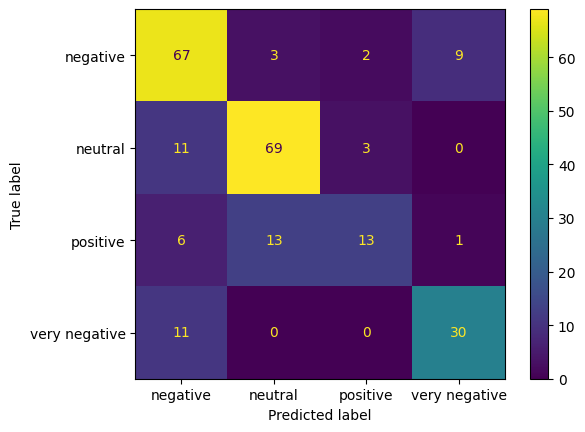

In [ ]:
disp.plot()

plt.savefig('Fewshot_confusion_matrix.png')

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(test_50['meta_review'],test_50['predicted']))

Accuracy: 0.7521008403361344


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_50['meta_review'],test_50['predicted']))

               precision    recall  f1-score   support

     negative       0.71      0.83      0.76        81
      neutral       0.81      0.83      0.82        83
     positive       0.72      0.39      0.51        33
very negative       0.75      0.73      0.74        41

     accuracy                           0.75       238
    macro avg       0.75      0.70      0.71       238
 weighted avg       0.75      0.75      0.74       238



# Test on 10000 data

In [ ]:
fewshot = pd.read_csv('/content/sample_data/Preprocessed_fewshotmulticlass.csv')

In [ ]:
fewshot.head()

,posts
0,so I have not post on my current health issue ...
1,I know as parent of child with down syndrome t...
2,hi might be over react but about a month ago m...
3,sign of leukemia are they differ for each type...
4,hi I was wonder if anyone here have been diagn...


In [ ]:
fewshot.tail()

,posts
10137,I have this weird lung problem I could not tak...
10138,we have a fire a few month ago my brother chea...
10139,I just find out that my dad have small cell lu...
10140,I am 35 year old and I recently bury both of m...
10141,welcome to the lung cancer subreddit this subr...


In [ ]:
fewshot.shape

(10142, 1)

In [ ]:
fewshot['predicted'] = clf.predict(fewshot['posts'].to_list())

In [ ]:
fewshot

,posts,predicted
0,so I have not post on my current health issue ...,negative
1,I know as parent of child with down syndrome t...,negative
2,hi might be over react but about a month ago m...,negative
3,sign of leukemia are they differ for each type...,neutral
4,hi I was wonder if anyone here have been diagn...,neutral
...,...,...
10137,I have this weird lung problem I could not tak...,neutral
10138,we have a fire a few month ago my brother chea...,negative
10139,I just find out that my dad have small cell lu...,negative
10140,I am 35 year old and I recently bury both of m...,negative


In [ ]:
fewshot.predicted.value_counts()

neutral          4295
negative         4051
very negative    1130
positive          666
Name: predicted, dtype: int64

# Fewshot Download

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Save fewshot variable as CSV file
fewshot.to_csv('/content/drive/MyDrive/fewshot.csv', index=False)

In [ ]:
from google.colab import files

# Download fewshot.csv file
files.download('/content/drive/MyDrive/fewshot.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Upload merged datas and Removing duplicates

In [ ]:
#Merged 10k fewshot annotated datas and 2k hand annotated datas
totaldata= pd.read_csv("/content/sample_data/fewshot.csv")

In [ ]:
totaldata.shape

(12514, 2)

In [ ]:
totaldata.head()

,posts,predicted
0,so I have not post on my current health issue ...,negative
1,I know as parent of child with down syndrome t...,negative
2,hi might be over react but about a month ago m...,negative
3,sign of leukemia are they differ for each type...,neutral
4,hi I was wonder if anyone here have been diagn...,neutral


In [ ]:
totaldata = totaldata.drop_duplicates(subset=["posts"], keep="last")

In [ ]:
totaldata.shape

(10392, 2)

In [ ]:
totaldata.duplicated().sum()

0

In [ ]:
totaldata.to_csv('/content/drive/MyDrive/totaldata.csv', index=False)

In [ ]:
from google.colab import files

# Download totaldata.csv file
files.download('/content/drive/MyDrive/totaldata.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>